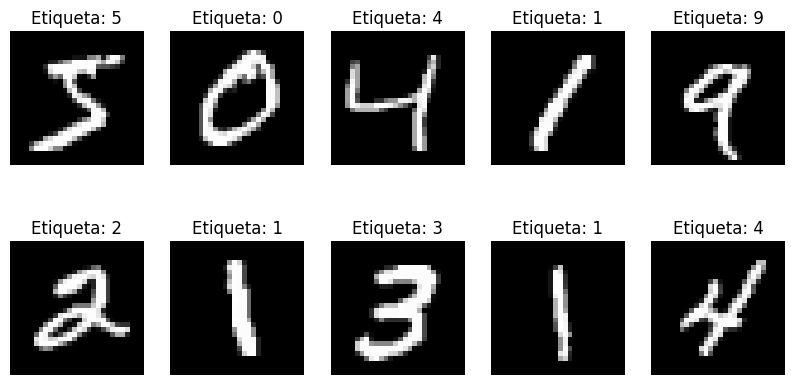

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Entrenando la red...
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8333 - loss: 0.5663 - val_accuracy: 0.9565 - val_loss: 0.1488
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9593 - loss: 0.1395 - val_accuracy: 0.9668 - val_loss: 0.1145
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9740 - loss: 0.0880 - val_accuracy: 0.9706 - val_loss: 0.1017
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9816 - loss: 0.0627 - val_accuracy: 0.9692 - val_loss: 0.1057
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9842 - loss: 0.0506 - val_accuracy: 0.9733 - val_loss: 0.0929
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9871 - loss: 0.0404 - val_accuracy: 0.9719 - val_loss: 0.1007
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9908 - loss: 0.0291 - val_accuracy: 0.9753 - val_loss: 0.0922
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9923 - loss: 0.0

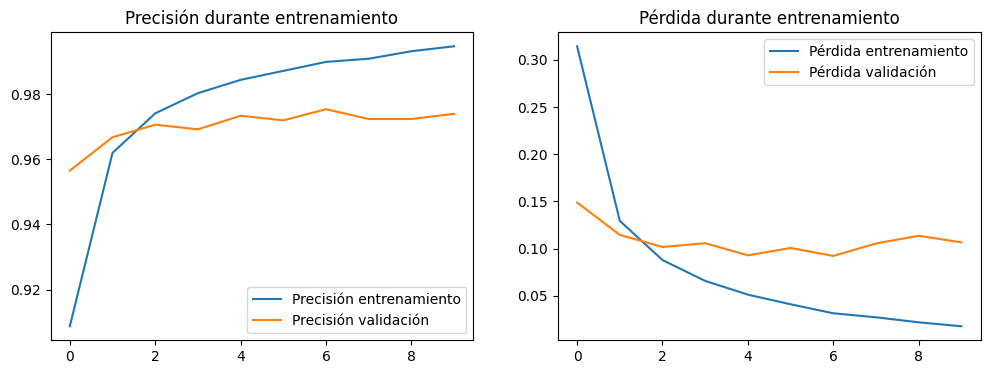

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9682 - loss: 0.1263

Precisión en test: 0.9723
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


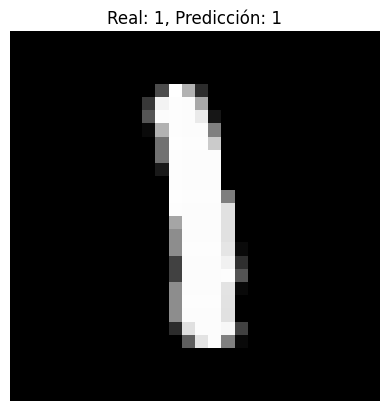

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# -------------------------------
# 1. Cargar datos (MNIST - dígitos 0-9)
# -------------------------------
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalizar imágenes (valores 0-255 -> 0-1)
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Mostrar ejemplo de datos
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off')
plt.show()

# -------------------------------
# 2. Preparar los datos
# -------------------------------
# Reformatear imágenes de 28x28 a vectores de 784 elementos
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

# Convertir etiquetas a one-hot encoding
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# -------------------------------
# 3. Construir la red neuronal
# -------------------------------
#
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28 * 28,)),  # Capa oculta
    layers.Dense(64, activation='relu'),                           # Otra capa oculta
    layers.Dense(10, activation='softmax')                         # Capa de salida (10 clases)
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# -------------------------------
# 4. Entrenar la red
# -------------------------------
print("\nEntrenando la red...")
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

# -------------------------------
# 5. Evaluar y mostrar resultados
# -------------------------------
# Gráfico de precisión y pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.title('Precisión durante entrenamiento')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida durante entrenamiento')
plt.legend()
plt.show()

# Evaluar con datos de test
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nPrecisión en test: {test_acc:.4f}")

# -------------------------------
# 6. Hacer predicciones
# -------------------------------
def predecir_imagen(modelo, imagen):
    # Reformatear y predecir
    imagen = imagen.reshape(1, 784)
    prediccion = modelo.predict(imagen)
    return np.argmax(prediccion)

# Seleccionar una imagen de test aleatoria
idx = np.random.randint(0, X_test.shape[0])
imagen_test = X_test[idx].reshape(28, 28)
etiqueta_real = np.argmax(y_test[idx])

# Predecir y mostrar
prediccion = predecir_imagen(model, X_test[idx])
plt.imshow(imagen_test, cmap='gray')
plt.title(f"Real: {etiqueta_real}, Predicción: {prediccion}")
plt.axis('off')
plt.show()
